In [30]:
import json
import numpy as np
import pandas as pd

In [26]:
with open('../data/scraped_data.json') as f:
    data = json.load(f)
features = data["features"]
features

[{'coordinates': [35.2030857, 31.135752],
  'Concentration Uncertainty (ppm m)': 553.0,
  'Max Plume Concentration (ppm m)': 2895.0,
  'plume_complex_count': 1,
  'country_code': 'il'},
 {'coordinates': [35.20281459382317, 31.12788965249969, 0.0],
  'Concentration Uncertainty (ppm m)': 553.0,
  'Max Plume Concentration (ppm m)': 2895.0,
  'plume_complex_count': 1,
  'country_code': 'il'},
 {'coordinates': [36.2257362, 31.9133135],
  'Concentration Uncertainty (ppm m)': 343.0,
  'Max Plume Concentration (ppm m)': 1331.0,
  'plume_complex_count': 2,
  'country_code': 'jo'},
 {'coordinates': [36.229802987188734, 31.909788946709373, 0.0],
  'Concentration Uncertainty (ppm m)': 343.0,
  'Max Plume Concentration (ppm m)': 1331.0,
  'plume_complex_count': 2,
  'country_code': 'jo'},
 {'coordinates': [40.4513543, 35.3082313],
  'Concentration Uncertainty (ppm m)': 526.0,
  'Max Plume Concentration (ppm m)': 3401.0,
  'plume_complex_count': 3,
  'country_code': 'sy'},
 {'coordinates': [40.45650

In [27]:
countries = set(e["country_code"] for e in features)
len(countries)

38

In [47]:
cu = {country:[feature["Concentration Uncertainty (ppm m)"] for feature in features if feature["country_code"] == country] for country in countries}
mpc = {country:[feature["Max Plume Concentration (ppm m)"] for feature in features if feature["country_code"] == country] for country in countries}
n = {country:sum([1 for feature in features if feature["country_code"] == country]) for country in countries}

In [36]:
def imei(mpc, cun, emc):
    return (mpc/1000*0.4 + (cun/(cun+mpc))*100*0.2 + emc*0.4)/10

a, b = imei(5000, 600, 3), imei(25000, 5000, 4)

result = []
for country in countries:
    IMEI = imei(sum(mpc[country]) / 2, sum(cu[country]) / 2, n[country] / 2)
    result.append((country, IMEI))

pd.DataFrame(result, columns=["country", "IMEI"]).sort_values(by="IMEI", ascending=False)

,country,IMEI
37,tm,25.677765
11,ir,13.120584
10,cn,11.165619
16,us,10.542730
32,dz,4.926328
6,uz,4.427184
26,kz,4.371372
9,sy,3.397678
14,pk,3.347894
3,iq,2.331210


In [37]:
result.sort(key=lambda x: x[1], reverse=True)

import pycountry
for r in result:
    print(pycountry.countries.get(alpha_2=r[0]).name, r[1], sep="\t\t\t")

Turkmenistan			25.67776501759614
Iran, Islamic Republic of			13.120584128452396
China			11.165619092752072
United States			10.542730185305848
Algeria			4.926327833731612
Uzbekistan			4.427183885752027
Kazakhstan			4.371371725043516
Syrian Arab Republic			3.397677893374323
Pakistan			3.3478941612200437
Iraq			2.3312102482907524
Libya			2.307494478628272
Mexico			2.2565531278077535
Jordan			2.209652293972617
Australia			2.0824972050474537
Egypt			2.0394891007183156
Yemen			1.9240421304433277
India			1.7032012942051964
Thailand			1.2545984779012054
Saudi Arabia			1.2440666308979014
Argentina			1.2428299744454667
Oman			1.1359332045416033
Brazil			1.115090472966041
South Africa			0.9501430770358427
Colombia			0.8974990000860512
Israel			0.8337465112375269
Bangladesh			0.7041276835907122
Chile			0.6775366046790642
Spain			0.67234291152931
Italy			0.660817482185273
Turkey			0.6563089399965416
Tunisia			0.650207415973979
Peru			0.608081963190184
Nepal			0.6052412093261594
Palestine, State of	

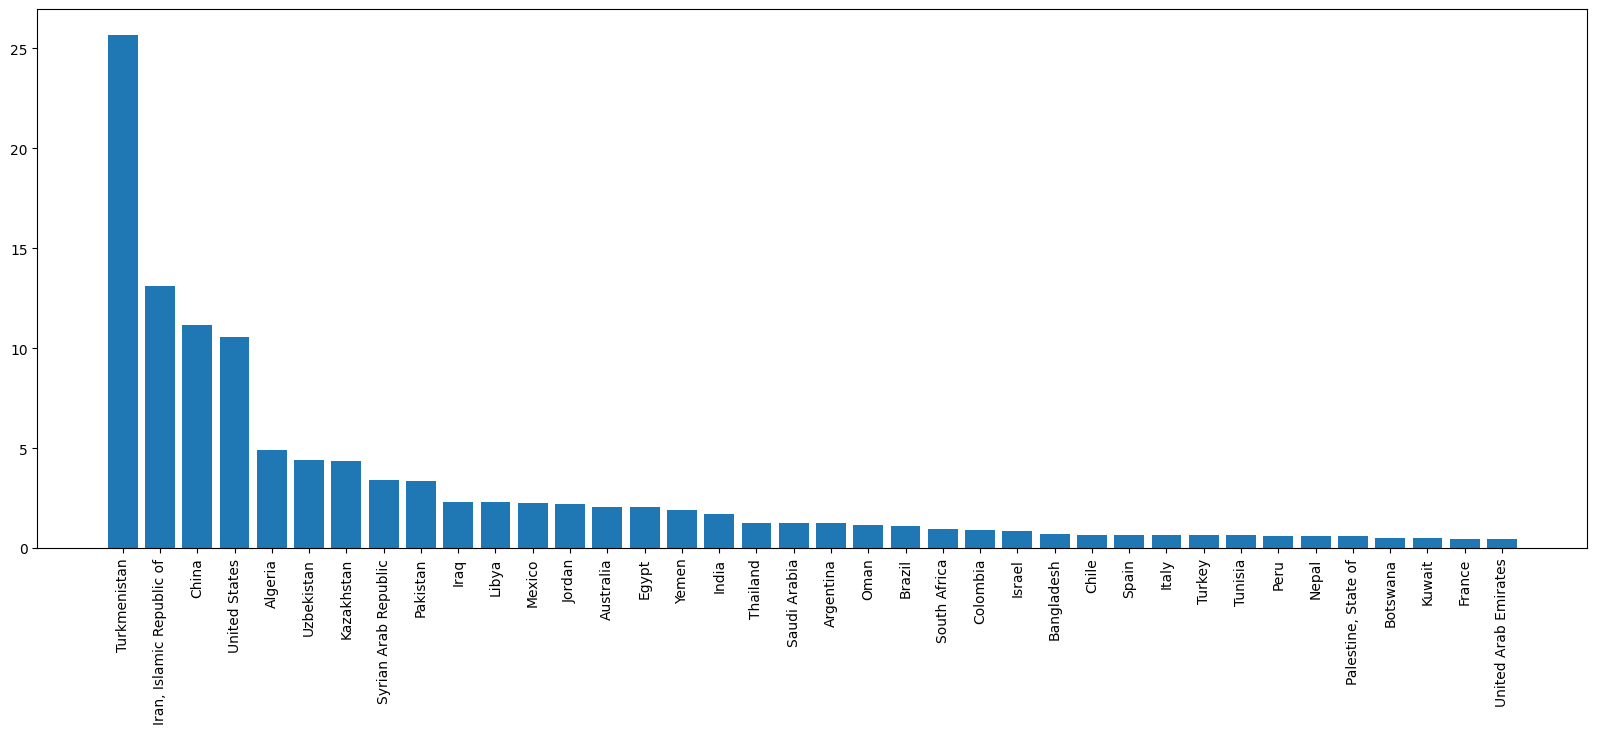

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 7))
plt.bar([pycountry.countries.get(alpha_2=r[0]).name for r in result], [r[1] for r in result])
plt.xticks(rotation=90)
None


In [23]:
# encode results to json
result_json = {pycountry.countries.get(alpha_2=r[0]).alpha_3 : r[1] for r in result}
result_json

f = open("../data/imei.json", "w")
f.write(json.dumps(result_json))

1011

In [24]:
f.close()

In [62]:
import plotly.express as px
import pandas as pd


# Example data
data = {
    'Category': [pycountry.countries.get(alpha_2=r[0]).name for r in result],
    'Values': [r[1] for r in result]
}
df = pd.DataFrame(data)

# Create a column plot
fig = px.bar(df, 
             x='Category', 
             y='Values',
             
             color='Values',
             color_continuous_scale=['magenta', 'blue']
            )

# Customize aspect
fig.update_layout(
    coloraxis_showscale=False,  # Hide color scale
    
    template='plotly_dark',
    xaxis_title="Country",
    yaxis_title="IMEI",
    title={
        'text': "IMEI by country",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
)

fig.show()

<Figure size 2000x2000 with 0 Axes>